In [46]:
# import libraries 
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

<h2>Define Hyper-parameters</h2>

In [81]:
#learning rate
lr = 0.01
#number of traning steps
num_steps = 500

#network parameters
n_hidden_1 = 2 # num hidden nodes in layer 1
num_input = 2 # dimension of input vector 
num_classes = 2 # num of output classes 

<h2>Define your input data and expected labels</h2>

In [82]:
#define the training input data
x = np.array([[0,0],[1,0],[1,1],[0,1]],np.float32)
#x = np.transpose(x)
#define the target outputs/labels for XOR gate
# num_class = 2 
y = np.array([[1,0],[0,1],[1,0],[0,1]],np.float32)

print(x)
print(y)

[[0. 0.]
 [1. 0.]
 [1. 1.]
 [0. 1.]]
[[1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]]


<h2>Define placeholder and Variables</h2>

In [83]:
# reset graph 
tf.reset_default_graph()

#tf graph input
X = tf.placeholder(tf.float32, shape=[ None , num_input] ,name='X') # place holder for input data 
Y = tf.placeholder(tf.int32, shape=[ None , num_classes],name='Y') # place holder for labels

#Layers weight & bias
weights = {
    'W1': tf.Variable(tf.random_normal([num_input, n_hidden_1]),name='W1'),
    'Wout': tf.Variable(tf.random_normal([n_hidden_1, num_classes]),name='Wout')
}

biases = {
    'b1': tf.Variable(tf.zeros(shape=[n_hidden_1]),name='b1'),  # specific bias b1 for each neuro
    'bout': tf.Variable(tf.zeros(shape=[num_classes]),name='bout') # specific bias bout for each class
}

<h2>Define the neural network</h2>

In [84]:
# refer to MNIST tutorial to define multiple layer neural network
# add in relu for non-linear activation 
def neural_net(x):
    layer_1_out = tf.nn.relu( tf.add(tf.matmul(x,weights['W1']),biases['b1']) )
    out =  tf.add(tf.matmul(layer_1_out,weights['Wout']),biases['bout']) 
    return out

<h2>Define cost function</h2>

In [85]:
#predicted labels
logits = neural_net(X) # go with real dataset

#define loss
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits,labels=Y),name='loss')
#define optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate=lr)
train_op = optimizer.minimize(loss)

#compare the predicted labels with true labels
correct_pred = tf.equal(tf.argmax(logits,1),tf.argmax(Y,1))

#compute the accuracy by taking average
accuracy = tf.reduce_mean(tf.cast(correct_pred,tf.float32),name='accuracy')

<h2>Execute training</h2>

In [86]:
#Initialize the variables
init = tf.global_variables_initializer()

acc_fit = np.zeros( num_steps)
with tf.Session() as sess:
    sess.run(init)
    
    for i in range(num_steps):        
        #run optimization
        sess.run(train_op, feed_dict={X:x, Y: y})        
        acc_fit[i] = sess.run(accuracy,feed_dict={X:x, Y:y})
        if i % 10 == 0:
            print("step "+str(i)+", Accuracy= {:.3f}".format(acc_fit[i]))
    
    print("Training finished!")
    
    print("Testing Accuracy:", sess.run(accuracy, feed_dict={X:x, Y:y}))
    
    # save weights and bias 
    weights = (sess.run(weights))
    biases = (sess.run(biases))
    

step 0, Accuracy= 0.250
step 10, Accuracy= 0.250
step 20, Accuracy= 0.250
step 30, Accuracy= 0.250
step 40, Accuracy= 0.250
step 50, Accuracy= 0.250
step 60, Accuracy= 0.250
step 70, Accuracy= 0.250
step 80, Accuracy= 0.250
step 90, Accuracy= 0.250
step 100, Accuracy= 0.250
step 110, Accuracy= 0.250
step 120, Accuracy= 0.250
step 130, Accuracy= 0.250
step 140, Accuracy= 0.250
step 150, Accuracy= 0.250
step 160, Accuracy= 0.250
step 170, Accuracy= 0.250
step 180, Accuracy= 0.250
step 190, Accuracy= 0.500
step 200, Accuracy= 0.500
step 210, Accuracy= 0.750
step 220, Accuracy= 0.750
step 230, Accuracy= 0.750
step 240, Accuracy= 0.750
step 250, Accuracy= 0.750
step 260, Accuracy= 0.750
step 270, Accuracy= 0.750
step 280, Accuracy= 0.750
step 290, Accuracy= 0.750
step 300, Accuracy= 0.750
step 310, Accuracy= 0.750
step 320, Accuracy= 0.750
step 330, Accuracy= 0.750
step 340, Accuracy= 0.750
step 350, Accuracy= 0.750
step 360, Accuracy= 0.750
step 370, Accuracy= 0.750
step 380, Accuracy= 0.7

In [110]:
def neural_net_eval(x):
    layer_1_out =  np.matmul(x,weights['W1']) + biases['b1' ] 
    layer_1_out[layer_1_out >=0] = 1
    layer_1_out[layer_1_out <0] = 0
    out = np.matmul(layer_1_out,weights['Wout']) + biases['bout']
    return out

<h2>Plot</h2>

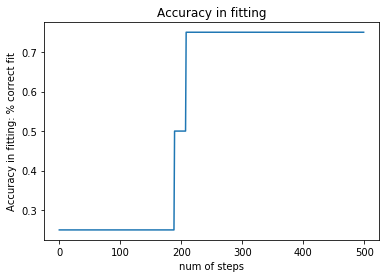

In [111]:
# plot accuracy 
plt.plot(acc_fit )
plt.xlabel("num of steps")
plt.ylabel("Accuracy in fitting: % correct fit")
plt.title("Accuracy in fitting")

plt.show()

In [112]:
colors = ["pink", "blue" ]

# generate grid of x 
ngrid = 25

newx = np.array(np.meshgrid( np.linspace(0,1, ngrid) , np.linspace(0,1, ngrid)  )).T.reshape(-1,2)

yhat = np.argmax( neural_net_eval( newx ) , 1) 

yhat.astype(int)

c = []
for i in range( yhat.shape[0] ):
    c.append(  colors[ yhat[i] ] )
    


In [114]:
yhat

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

In [113]:
grp = np.array( [0,1,0,1] )

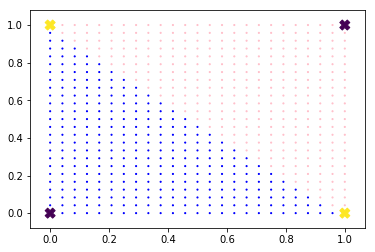

In [115]:
plt.scatter( newx[:, 0], newx[:, 1], c=c, marker=".", s=5)
plt.scatter(x[:, 0], x[:, 1], c=np.squeeze(grp), marker="X", s=100, cmap='viridis')
plt.show()